In [67]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from datetime import datetime

#create a dataframe from json file in data directory
df_org = pd.read_json('data/2024-11-18.json')

def compute_average_ask_bid(price_data):
    if( price_data['Ask'] is not None and price_data['Bid'] is not None):
        return (price_data['Ask'] + price_data['Bid']) / 2
    else:
        return None


df_org['closedprices'] = [compute_average_ask_bid(closedprice) for closedprice in df_org["ClosePrice"]];
df_org['highPrices'] = [compute_average_ask_bid(HighPrice) for HighPrice in df_org["HighPrice"]];
df_org['lowPrices'] = [compute_average_ask_bid(LowPrice) for LowPrice in df_org["LowPrice"]];
df_org['openPrices'] = [compute_average_ask_bid(OpenPrice) for OpenPrice in df_org["OpenPrice"]];

## Drop rows with None values
df_org.dropna(subset=['closedprices', 'highPrices', 'lowPrices', 'openPrices'], inplace=True)


# Compute olhc4
df_org['olhc4'] = (df_org['closedprices'] + df_org['highPrices'] + df_org['lowPrices'] + df_org['openPrices']) / 4
# Compute log returns
df_org['log_returns'] = np.log(df_org['olhc4'] / df_org['olhc4'].shift(1))


df_org.head()

,ClosePrice,HighPrice,LastTradedVolume,LowPrice,OpenPrice,SnapshotTime,SnapshotTimeUTC,closedprices,highPrices,lowPrices,openPrices,olhc4,log_returns
0,"{'Ask': 7290.0, 'Bid': 7288.0, 'LastTraded': N...","{'Ask': 7297.0, 'Bid': 7294.0, 'LastTraded': N...",74,"{'Ask': 7288.7, 'Bid': 7286.7, 'LastTraded': N...","{'Ask': 7296.2, 'Bid': 7293.2, 'LastTraded': N...",2024/11/18 08:00:00,2024-11-18T07:00:00,7289.0,7295.5,7287.7,7294.7,7291.725,NaN
1,"{'Ask': 7282.7, 'Bid': 7280.7, 'LastTraded': N...","{'Ask': 7289.0, 'Bid': 7287.0, 'LastTraded': N...",53,"{'Ask': 7282.7, 'Bid': 7280.7, 'LastTraded': N...","{'Ask': 7289.0, 'Bid': 7287.0, 'LastTraded': N...",2024/11/18 08:01:00,2024-11-18T07:01:00,7281.7,7288.0,7281.7,7288.0,7284.850,-0.000943
2,"{'Ask': 7278.0, 'Bid': 7276.0, 'LastTraded': N...","{'Ask': 7283.2, 'Bid': 7281.2, 'LastTraded': N...",18,"{'Ask': 7277.7, 'Bid': 7275.7, 'LastTraded': N...","{'Ask': 7283.2, 'Bid': 7281.2, 'LastTraded': N...",2024/11/18 08:02:00,2024-11-18T07:02:00,7277.0,7282.2,7276.7,7282.2,7279.525,-0.000731
3,"{'Ask': 7283.2, 'Bid': 7281.2, 'LastTraded': N...","{'Ask': 7283.2, 'Bid': 7281.2, 'LastTraded': N...",25,"{'Ask': 7278.2, 'Bid': 7276.2, 'LastTraded': N...","{'Ask': 7278.2, 'Bid': 7276.2, 'LastTraded': N...",2024/11/18 08:03:00,2024-11-18T07:03:00,7282.2,7282.2,7277.2,7277.2,7279.700,0.000024
4,"{'Ask': 7279.7, 'Bid': 7277.7, 'LastTraded': N...","{'Ask': 7283.0, 'Bid': 7281.0, 'LastTraded': N...",22,"{'Ask': 7279.2, 'Bid': 7277.2, 'LastTraded': N...","{'Ask': 7283.0, 'Bid': 7281.0, 'LastTraded': N...",2024/11/18 08:04:00,2024-11-18T07:04:00,7278.7,7282.0,7278.2,7282.0,7280.225,0.000072


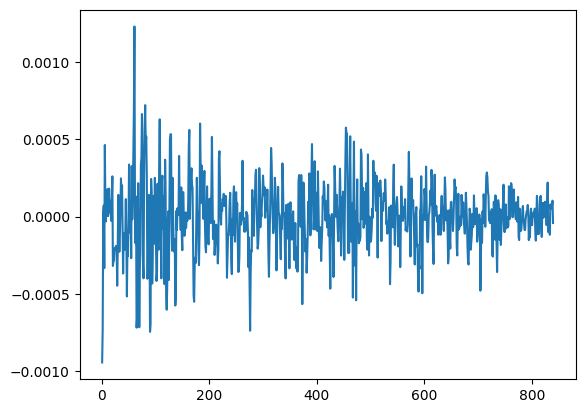

In [68]:


plt.plot(df_org['log_returns'] )
plt.show()